# Connect to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/FDS-Finals

[Errno 2] No such file or directory: '/content/drive/MyDrive/FDS-Finals'
/content


# Libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-19-5e4ad6c265c6>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Pre-processing Dataframe

In [ ]:
# Get the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FDS - DataScience/FINAL/healthcare-dataset-stroke-data.csv")

In [ ]:
# Inspect the dataset
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Replaces the missing values in the 'bmi' column with the mean of the available values
dataset.bmi.fillna(dataset.bmi.mean(), inplace=True)

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
# Standardization on the columns age, avg_glucose_level, and bmi   ???????????????????????????
df_norm = dataset.copy()

std = StandardScaler()
cols = ['age','avg_glucose_level', 'bmi']
norm = std.fit_transform(df_norm[cols])

df_norm[cols] = pd.DataFrame(norm)

df_norm

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,1.051434,0,1,Yes,Private,Urban,2.706375,1.001234e+00,formerly smoked,1
1,51676,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,4.615554e-16,never smoked,1
2,31112,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,4.685773e-01,never smoked,1
3,60182,Female,0.255342,0,0,Yes,Private,Urban,1.437358,7.154182e-01,smokes,1
4,1665,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-6.357112e-01,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,1.626390,1,0,Yes,Private,Urban,-0.494658,4.615554e-16,never smoked,0
5106,44873,Female,1.670617,0,0,Yes,Self-employed,Urban,0.420775,1.442949e+00,never smoked,0
5107,19723,Female,-0.363842,0,0,Yes,Self-employed,Rural,-0.511443,2.217363e-01,never smoked,0
5108,37544,Male,0.343796,0,0,Yes,Private,Rural,1.328257,-4.278451e-01,formerly smoked,0


In [ ]:
# RUN ONLY ONE TIME
run = False
if(run):
  # It removes the single row where the 'gender' column has the value 'Other'
  dataset.drop(dataset.loc[dataset['gender'] =='Other'].index, inplace=True)

  # GENDER: F/M --> 1/0
  dataset["gender"] = dataset["gender"].apply(lambda x: 1 if x=="Female" else 0)

  # EVER_MARRIED: YES/NO --> 1/0
  dataset["ever_married"] = dataset["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

  # RESIDENCE_TYPE: URBAN/RURAL --> 1/0
  dataset["Residence_type"] = dataset["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,44873,1,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,19723,1,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,37544,0,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


# Descriptive analysis

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
dataset.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
df = dataset.copy()

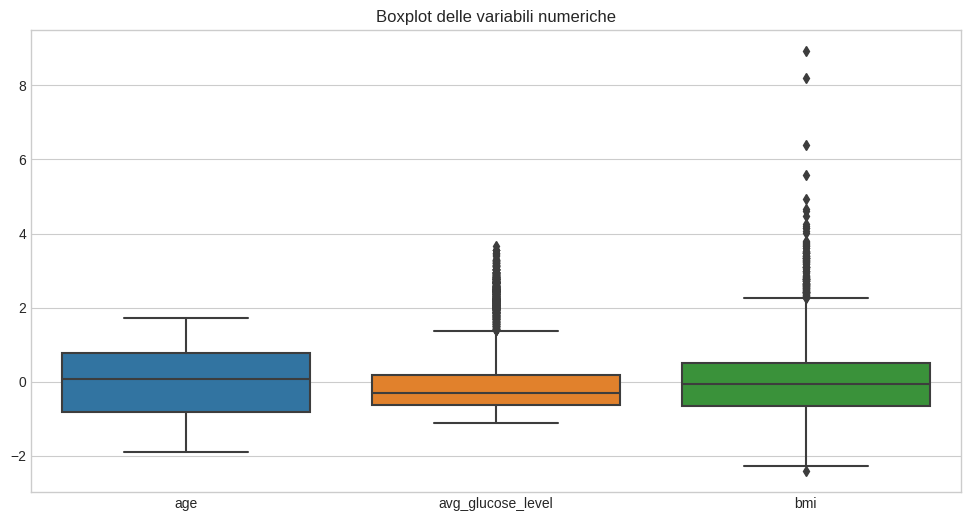

In [ ]:
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
df_norm[numeric_columns].describe().transpose()

#Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_norm[numeric_columns])
plt.title('Boxplot delle variabili numeriche')
plt.show()

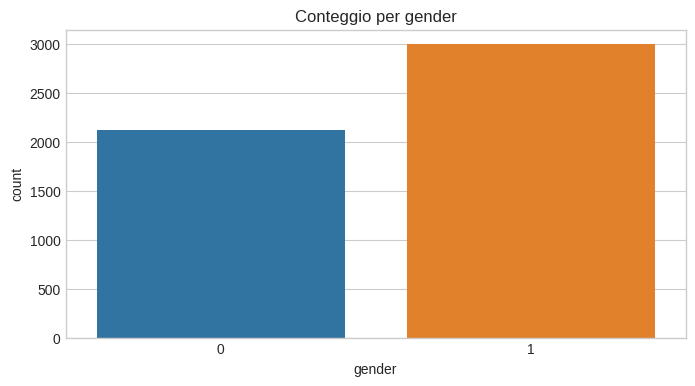

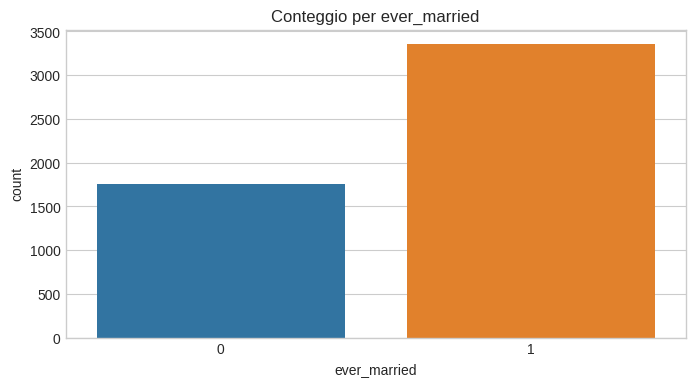

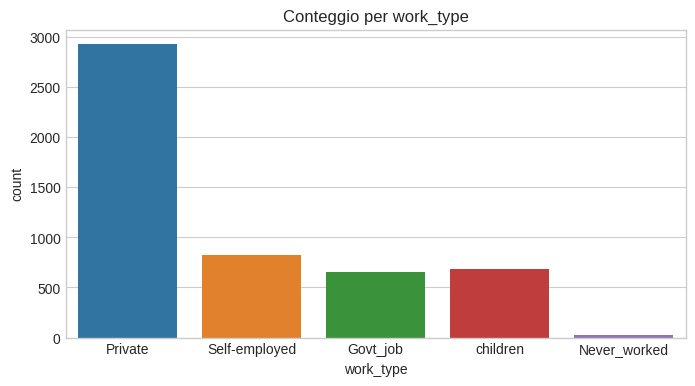

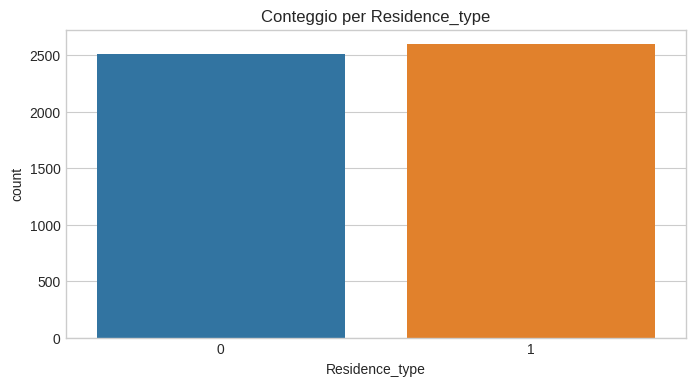

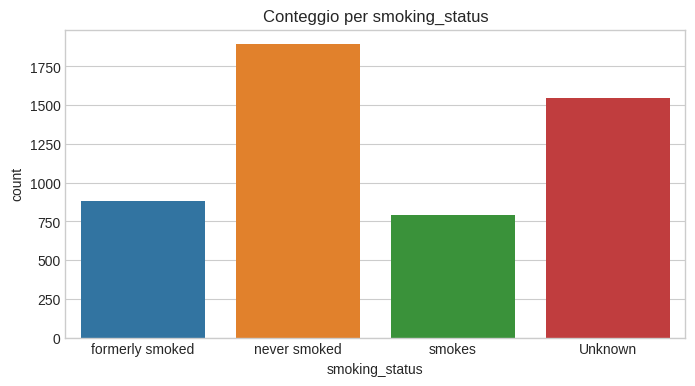

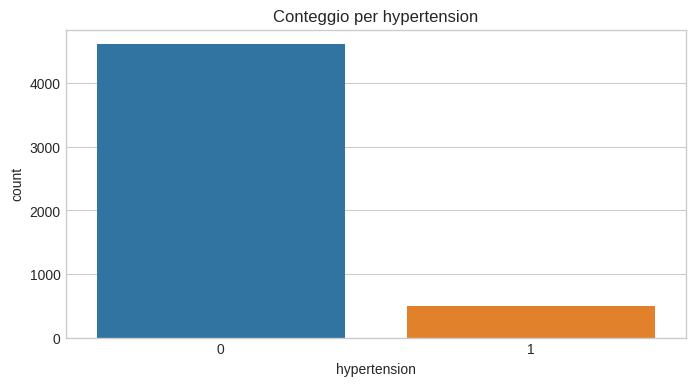

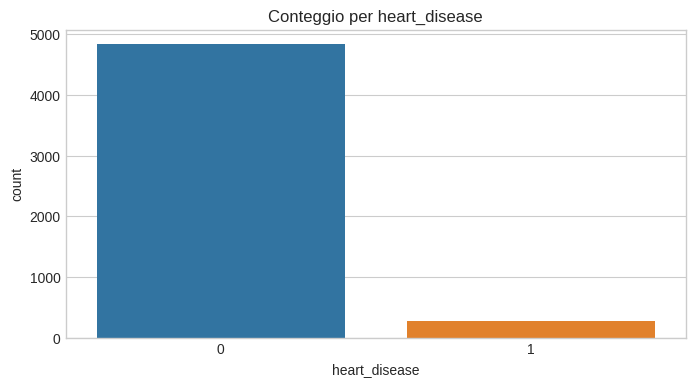

In [ ]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','hypertension', 'heart_disease']
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column)
    plt.title(f'Conteggio per {column}')
    plt.show()

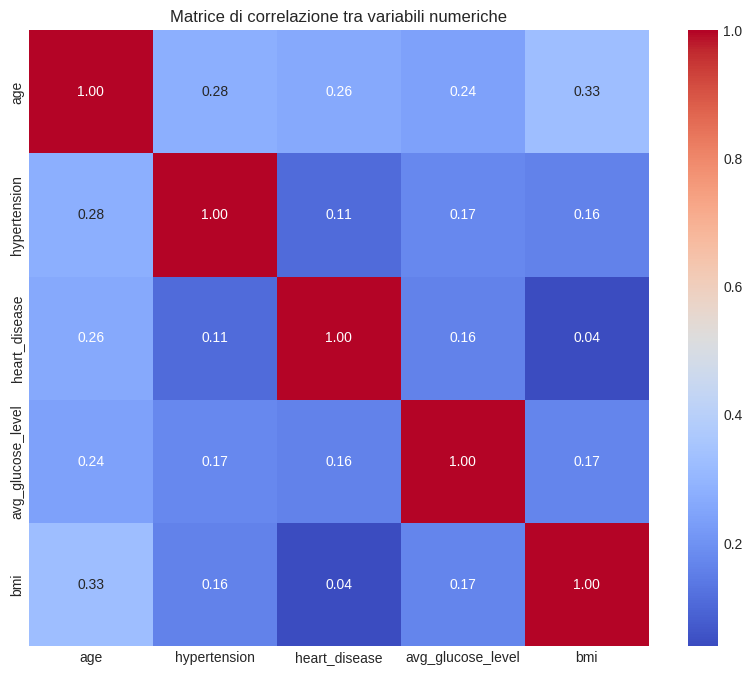

In [ ]:
#Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione tra variabili numeriche')
plt.show()

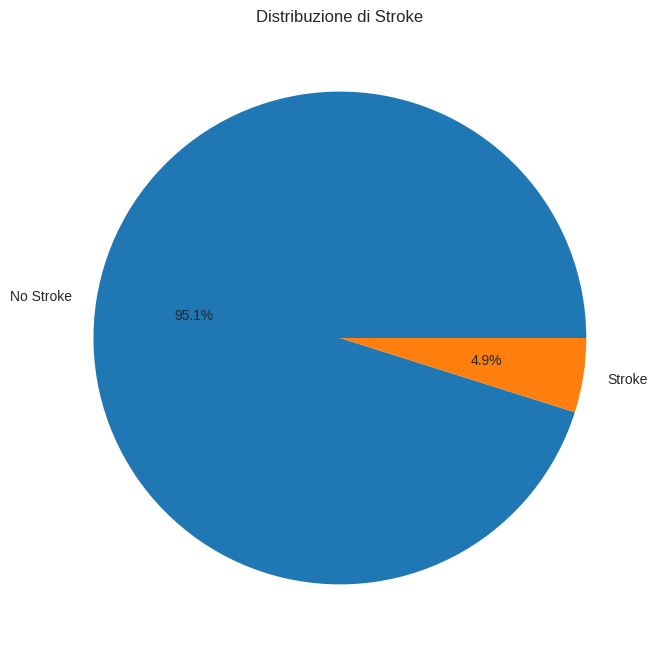

In [ ]:
plt.figure(figsize=(8, 8))
df['stroke_label'] = df['stroke'].map({1: 'Stroke', 0: 'No Stroke'})
stroke_distribution = df['stroke_label'].value_counts()
plt.pie(stroke_distribution, labels=stroke_distribution.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
plt.title('Distribuzione di Stroke')
plt.show()


<Figure size 1000x600 with 0 Axes>

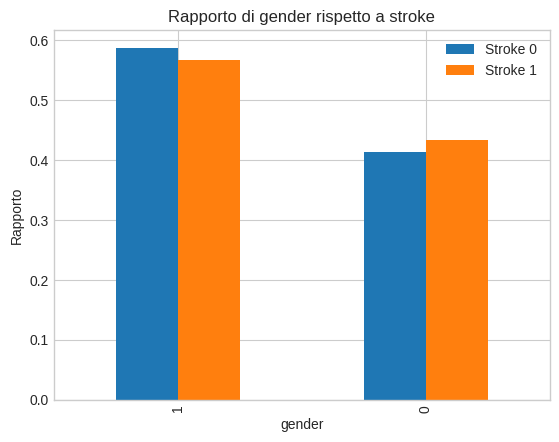

<Figure size 1000x600 with 0 Axes>

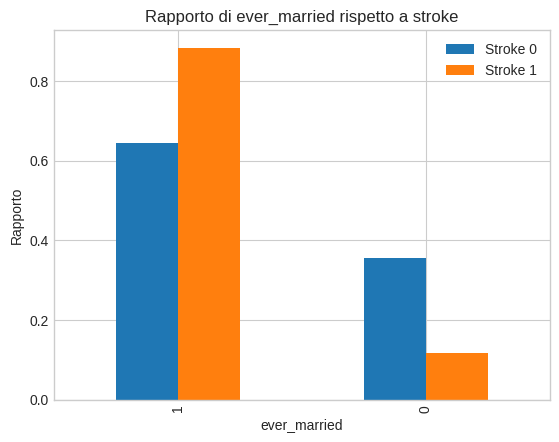

<Figure size 1000x600 with 0 Axes>

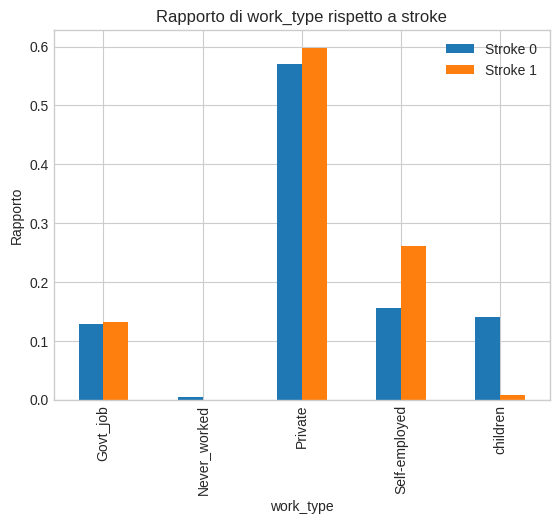

<Figure size 1000x600 with 0 Axes>

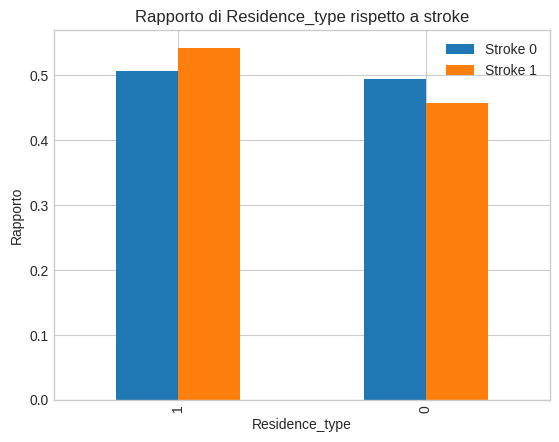

<Figure size 1000x600 with 0 Axes>

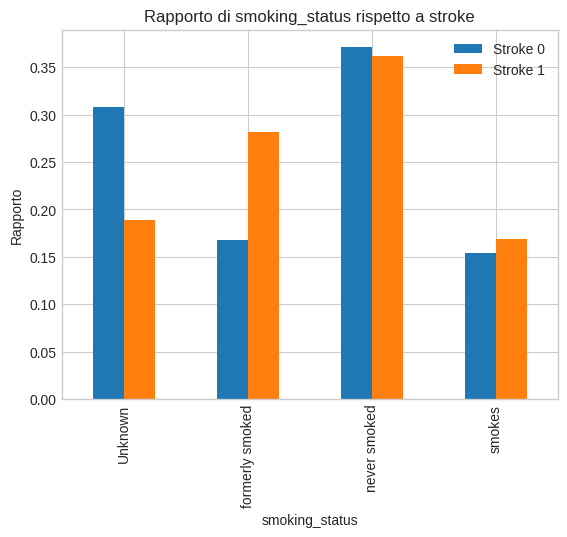

<Figure size 1000x600 with 0 Axes>

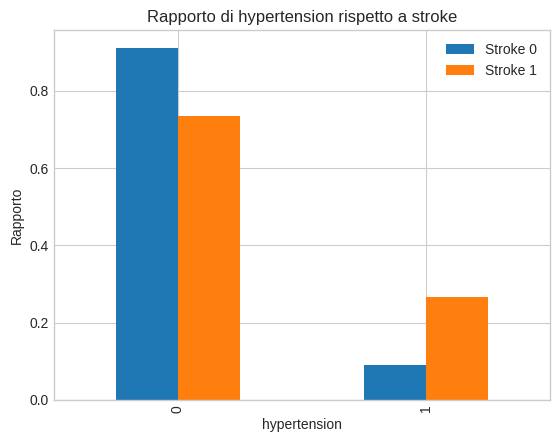

<Figure size 1000x600 with 0 Axes>

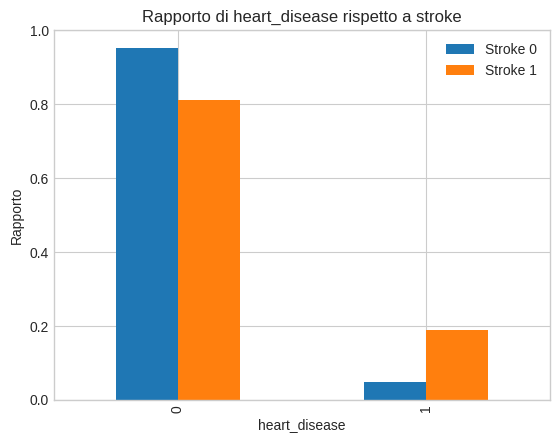

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Calcola il rapporto tra count di y con quella modalità sul totale di quelli con stroke=0
    counts_stroke_0 = df[df['stroke'] == 0][column].value_counts()
    total_stroke_0 = df[df['stroke'] == 0].shape[0]
    ratio_stroke_0 = counts_stroke_0 / total_stroke_0

    # Calcola il rapporto tra count di y con quella modalità sul totale di quelli con stroke=1
    counts_stroke_1 = df[df['stroke'] == 1][column].value_counts()
    total_stroke_1 = df[df['stroke'] == 1].shape[0]
    ratio_stroke_1 = counts_stroke_1 / total_stroke_1

    # Unisci i due dataframe
    ratio_df = pd.DataFrame({
        'Stroke 0': ratio_stroke_0,
        'Stroke 1': ratio_stroke_1
    })

    ratio_df.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
    plt.title(f'Rapporto di {column} rispetto a stroke')
    plt.ylabel('Rapporto')
    plt.xlabel(column)
    plt.show()